In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Existing employees

In [2]:
Existing_employees = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', 
                           sheet_name = 'Existing employees')
#Copy of existing employees data
E_emp = Existing_employees.copy()
E_emp.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [12]:
E_emp.isnull().value_counts()

Emp ID  satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  promotion_last_5years  dept   salary
False   False               False            False           False                 False               False          False                  False  False     11428
dtype: int64

In [15]:
E_emp.describe(include = 'all')

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428,11428
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3126,5144
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,NaN,NaN
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889,NaN,NaN
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,NaN,NaN
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,NaN,NaN
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,NaN,NaN
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,NaN,NaN


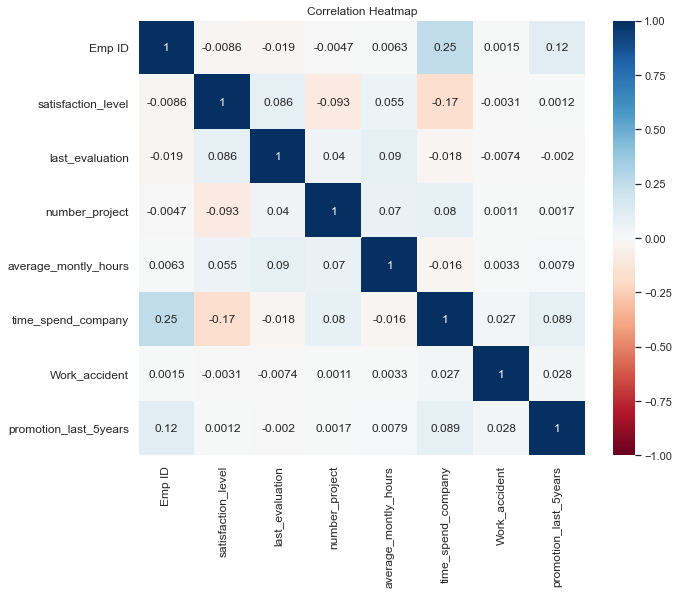

In [16]:
plt.figure(figsize = (10, 8))
s = sns.heatmap(E_emp.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Number of employees')

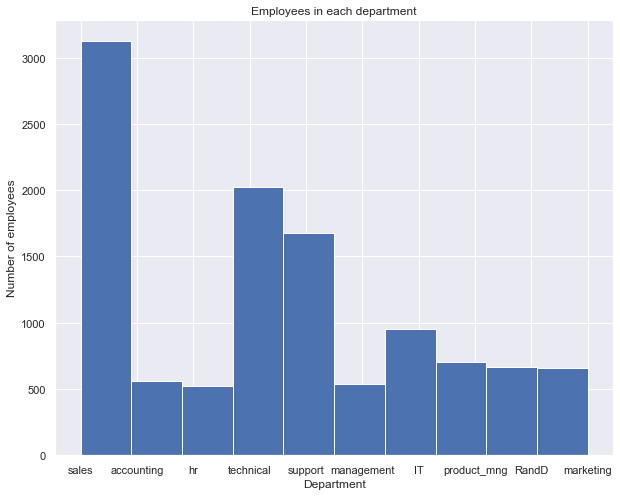

In [17]:
plt.figure(figsize = (10,8))
plt.hist(Existing_employees['dept'])
plt.title('Employees in each department')
plt.xlabel('Department')
plt.ylabel('Number of employees')

In [13]:
#Salary category for existing customers
Salary_cat_E = Existing_employees[['salary']].groupby(Existing_employees['salary']).count()
Salary_cat_E

,salary
salary,
high,1155
low,5144
medium,5129


Text(0.5, 1.0, 'Percentage of Existing employees based on Salary')

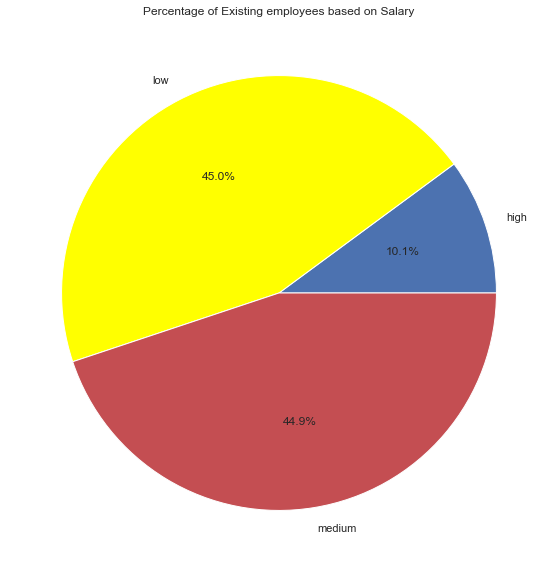

In [14]:
plt.figure(figsize = (10,10))
plt.pie(Salary_cat_E['salary'],
        labels =Salary_cat_E.salary.index,
       colors =['b','yellow','r'],
       autopct = '%1.1f%%')
plt.title('Percentage of Existing employees based on Salary')

Text(0, 0.5, 'Number of employees')

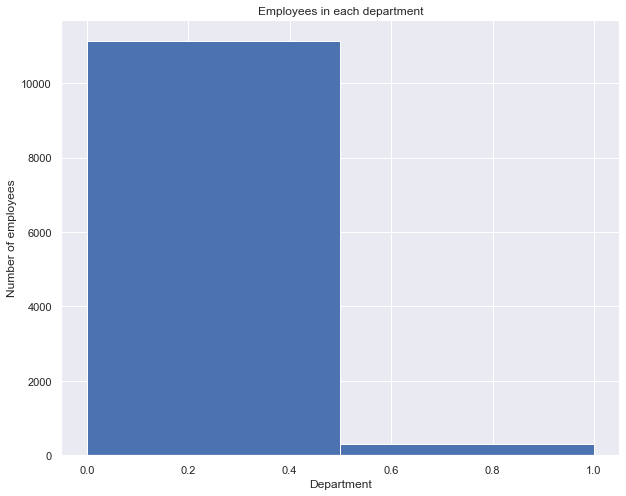

In [43]:
plt.figure(figsize = (10,8))
plt.hist(E_emp['promotion_last_5years'], bins = [0,0.5,1])
plt.title('Employees in each department')
plt.xlabel('Department')
plt.ylabel('Number of employees')

## Employees who have left

In [21]:
Past_employees = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', 
                           sheet_name = 'Employees who have left')
# copy of Past_employees data
P_emp = Past_employees.copy()
P_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [22]:
P_emp.describe(include = 'all')

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571,3571
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1014,2172
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,NaN,NaN
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,NaN,NaN
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,NaN,NaN
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,NaN,NaN
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,NaN,NaN
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,NaN,NaN


Text(0, 0.5, 'Number of employees')

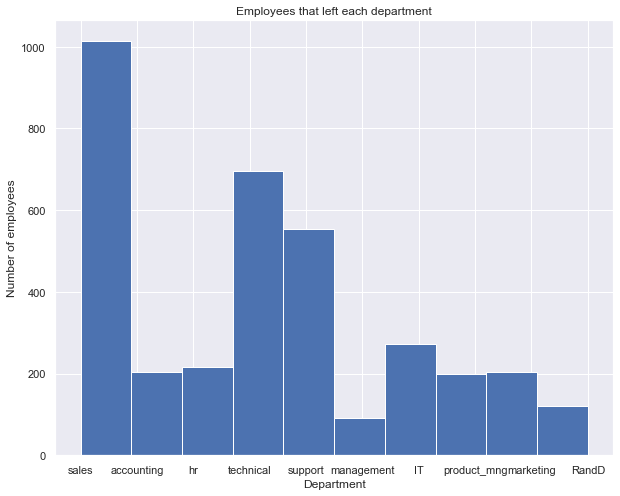

In [62]:
plt.figure(figsize = (10,8))
plt.hist(P_emp['dept'])
plt.title('Employees that left each department')
plt.xlabel('Department')
plt.ylabel('Number of employees')

Text(0, 0.5, 'Number of employees')

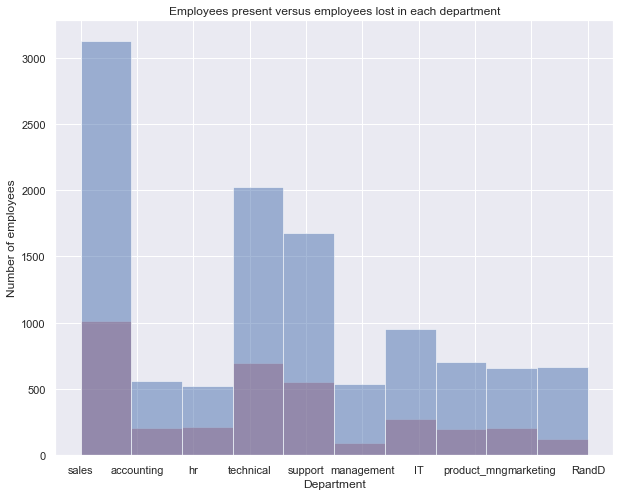

In [68]:
plt.figure(figsize = (10,8))
plt.hist(P_emp['dept'],color = 'indianred', alpha = 0.5)
plt.hist(Existing_employees['dept'], alpha = 0.5)
plt.title('Employees present versus employees lost in each department')
plt.xlabel('Department')
plt.ylabel('Number of employees')

In [31]:
#Salary Category for past employees
Salary_cat_P = Past_employees[['salary']].groupby(Past_employees['salary']).count()
Salary_cat_P

,salary
salary,
high,82
low,2172
medium,1317


Text(0.5, 1.0, 'Percentage of Existing employees based on Salary')

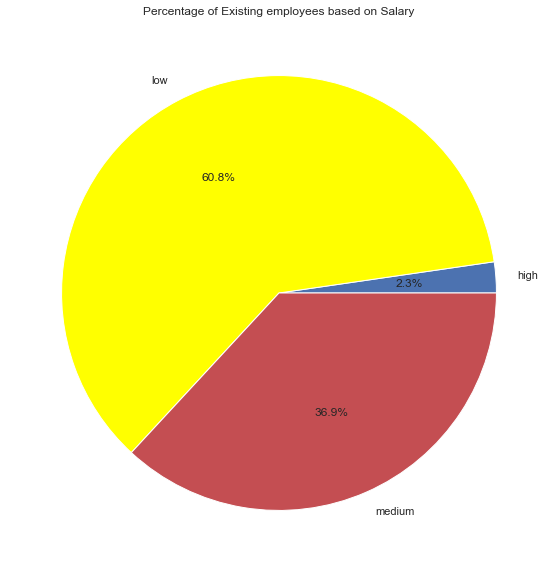

In [33]:
plt.figure(figsize = (10,10))
plt.pie(Salary_cat_P['salary'],
        labels =Salary_cat_P.index,
       colors =['b','yellow','r'],
       autopct = '%1.1f%%')
plt.title('Percentage of Existing employees based on Salary')

Text(0, 0.5, 'Number of employees')

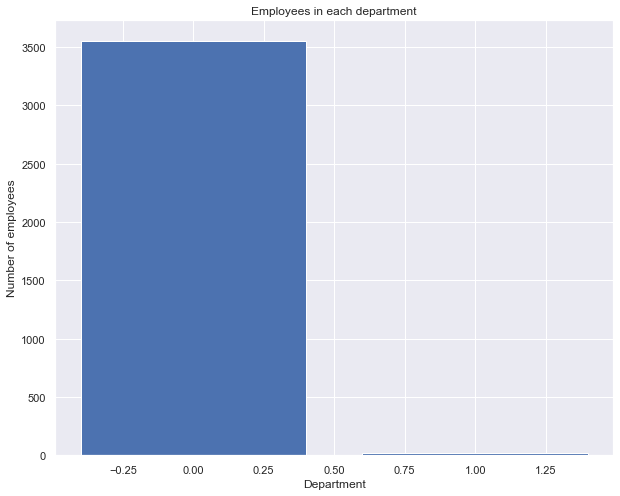

In [59]:
plt.figure(figsize = (10,8))
plt.bar([0,1], 
       y.values)
plt.title('Employees in each department')
plt.xlabel('Department')
plt.ylabel('Number of employees')